d:\Users\epiph\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


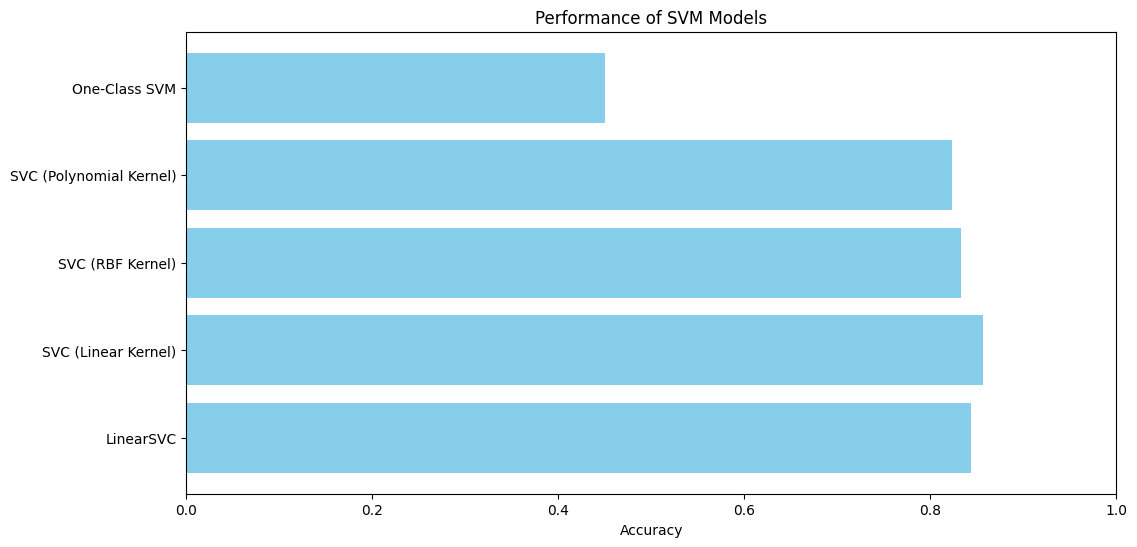

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC, LinearSVC, OneClassSVM

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define all SVM models
models = {
    "LinearSVC": LinearSVC(random_state=42, max_iter=10000),
    "SVC (Linear Kernel)": SVC(kernel='linear', random_state=42),
    "SVC (RBF Kernel)": SVC(kernel='rbf', random_state=42, gamma='scale'),
    "SVC (Polynomial Kernel)": SVC(kernel='poly', random_state=42, degree=3),
    "One-Class SVM": OneClassSVM(kernel='rbf', gamma='scale')
}

# Train, predict and evaluate all models
results = {}
for name, model in models.items():
    try:
        # For One-Class SVM, labels must be 1 for inliers and -1 for outliers
        if name == "One-Class SVM":
            y_train_oc = np.ones(len(y_train))
            model.fit(X_train)
            y_pred = model.predict(X_test)
            y_pred = (y_pred == 1).astype(int)  # Convert back to binary format
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = accuracy
    except Exception as e:
        results[name] = f"Failed: {str(e)}"

# Plot results
plt.figure(figsize=(12, 6))
names = list(results.keys())
accuracies = [results[name] if isinstance(results[name], float) else 0 for name in names]

plt.barh(names, accuracies, color='skyblue')
plt.xlabel("Accuracy")
plt.title("Performance of SVM Models")
plt.xlim(0, 1.0)
plt.show()


### **模型特点、适用场景及优缺点**

#### **1. LinearSVC**
- **特点**：
  - 线性支持向量分类器，基于线性核函数。
  - 使用优化的算法实现，速度较快。
- **适用场景**：
  - 数据线性可分，或者接近线性可分。
  - 大规模数据集。
- **优点**：
  - 效率高，适合高维数据。
  - 能处理稀疏数据。
- **缺点**：
  - 无法处理非线性数据。
  - 需要调节正则化参数。

---

#### **2. SVC (Linear Kernel)**
- **特点**：
  - 支持向量机的基础实现，使用线性核函数。
  - 适合线性或近似线性分布数据。
- **适用场景**：
  - 数据较少但需要精准分类。
- **优点**：
  - 结果鲁棒性强。
- **缺点**：
  - 比 LinearSVC 慢，对大规模数据不适合。

---

#### **3. SVC (RBF Kernel)**
- **特点**：
  - 使用径向基函数（RBF）作为核函数，适合非线性分布。
  - 对参数 `gamma` 和 `C` 的选择敏感。
- **适用场景**：
  - 数据具有非线性分布，簇之间的边界复杂。
- **优点**：
  - 能处理复杂非线性数据。
  - 表现优异，适合中小规模数据集。
- **缺点**：
  - 对参数敏感，需通过交叉验证调参。
  - 对大规模数据较慢。

---

#### **4. SVC (Polynomial Kernel)**
- **特点**：
  - 使用多项式核函数，能够捕捉非线性特征。
  - 参数 `degree` 控制多项式的次数。
- **适用场景**：
  - 数据分布较复杂但具有一定的多项式关系。
- **优点**：
  - 能捕捉复杂的特征交互。
- **缺点**：
  - 计算复杂度高，尤其是高次多项式。
  - 对参数调整敏感。

---

#### **5. One-Class SVM**
- **特点**：
  - 用于异常检测或单类分类任务。
  - 学习正常样本的分布，对异常样本进行标记。
- **适用场景**：
  - 异常检测、孤立点检测。
  - 无标签数据或只有单一标签的数据。
- **优点**：
  - 能处理复杂分布，鲁棒性强。
- **缺点**：
  - 对参数 `gamma` 和 `nu` 非常敏感。
  - 需要仔细调参。

---

### **总结对比表**

| **模型**                  | **特点**                                   | **适用场景**                 | **优点**                           | **缺点**                               |
|---------------------------|--------------------------------------------|------------------------------|------------------------------------|----------------------------------------|
| **LinearSVC**             | 线性分类器，效率高                         | 高维数据，大规模数据          | 高效，支持稀疏数据                 | 无法处理非线性数据                     |
| **SVC (Linear Kernel)**   | 支持向量机的基础实现，线性核               | 小规模线性分类任务            | 分类鲁棒性强                      | 比 LinearSVC 慢                        |
| **SVC (RBF Kernel)**      | 非线性分类器，径向基核                     | 复杂非线性数据                | 能处理复杂非线性分布              | 参数敏感，对大数据慢                   |
| **SVC (Polynomial Kernel)**| 非线性分类器，多项式核                    | 数据有多项式关系              | 捕捉复杂交互关系                  | 对高次多项式的计算开销大               |
| **One-Class SVM**         | 单类分类器，用于异常检测                   | 异常检测、无标签任务           | 处理复杂分布，鲁棒性强            | 参数敏感，调试复杂                     |

---

### **选型建议**
1. **线性可分数据**：选择 `LinearSVC` 或 `SVC (Linear Kernel)`。
2. **非线性分布数据**：选择 `SVC (RBF Kernel)` 或 `SVC (Polynomial Kernel)`。
3. **异常检测任务**：选择 `One-Class SVM`。

